一般的 zadoff 码, 其数学表达式可以写成:  
$$
  x_u(m) = e^{-j \frac{\pi u m (m+1)}{L}} \quad m=0,1,\cdots, L-1
$$
**这个函数是以 L 为周期的**  
**证明**:  

$$
\begin{align}
 x_u(m+L) & = e^{-j \frac{\pi u (m+L) (m+L+1)}{L}}  \\
          & = e^{-j \frac{\pi u m (m+1)}{L}}  e^{ -j 2\pi u(m+\frac{L+1}{2}) }
\end{align}
$$

zadoff 码长一般为质数，L>2 时 L 一定为奇数, 所以, L+1 一定为偶数  
所以  
$$
 x_u(m+L) = x_u(m)
$$
证毕.  



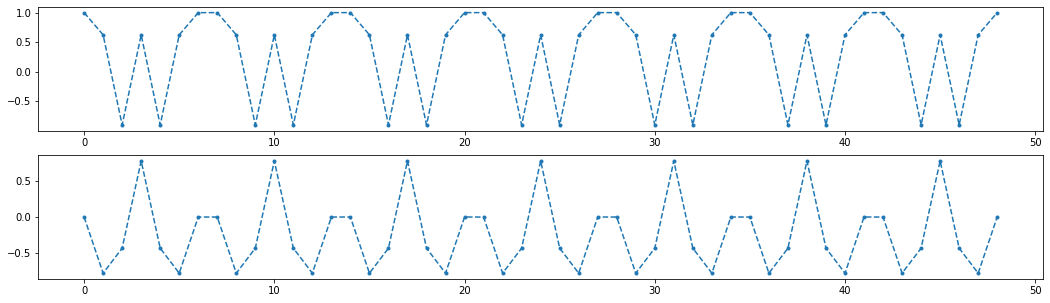

In [11]:
import matplotlib.pyplot as plt
import numpy as np

L = 7
u = 3

m = np.arange(7*L)

x = np.exp(-1j * np.pi * m * (m+1) / L)

fig,[ax_re,ax_im] = plt.subplots(2,1,figsize=(18,5))
ax_re.plot(m, np.real(x),".--")
ax_im.plot(m, np.imag(x),".--")

对 ZC 序列做 DFT：  
$$
   Y[k]= \sum_{m=0}^{L-1}x_u(m) e^{-j 2\pi\frac{k}{L}m}
$$ 

把 $x_u$ 的表达式代入上式： 
$$
\begin{align}
   Y[k] &= \sum_{m=0}^{L-1} e^{-j \frac{\pi u m (m+1)}{L}} e^{-j 2\pi\frac{k}{L}m}  \\
        &= \sum_{m=0}^{L-1} e^{-j \frac{\pi u m (m+1)+2\pi km}{L}}   \tag{1}
\end{align}
$$
找一个自然数 v, 是的 uv mod L = 1, 构造一个表达式：  
$$
e^{j\frac{\pi u \color{red}{vk}(\color{red}{vk}+1)}{L}}
$$
把公式 (1) 中提取出上式:  
$$
Y[k]=e^{j\frac{\pi u \color{red}{vk}(\color{red}{vk}+1)}{L}} 
      \sum_{m=0}^{L-1} e^{-j \frac{\pi um(m+1)+2\pi km + \pi u \color{red}{vk} ( \color{red}{vk}+1)}{L}}
$$
因为 uv 模 L 余 1, 所以，可以把 uv 乘在分子的任何一项上，容易证明，乘完之后不改变原等式.  
$$
\begin{align}
Y[k] &=e^{j\frac{\pi u \color{red}{vk}(\color{red}{vk}+1)}{L}} 
       \sum_{m=0}^{L-1} e^{-j \frac{\pi um(m+1)+2\pi km \color{blue}{uv} + \pi u \color{red}{vk} ( \color{red}{vk}+1)}{L}}  \\
     &=e^{j\frac{\pi u \color{red}{vk}(\color{red}{vk}+1)}{L}} 
        \sum_{m=0}^{L-1} e^{-j \pi u \frac{ m(m+1)+2 km \color{blue}{v} +  \color{red}{vk} ( \color{red}{vk}+1)}{L}}  \\
\end{align}
$$
其中  
$$
m(m+1)+2kmv+vk(vk+1)=m^2+(2kv+1)m+vk(vk+1)=(m+vk)(m+vk+1)
$$
所以  
$$
Y[k]=e^{j\frac{\pi u \color{red}{vk}(\color{red}{vk}+1)}{L}} 
        \sum_{m=0}^{L-1} e^{-j \pi u \frac{(m+vk)(m+vk+1)}{L}}  
$$
上式中的求和项, 也是一个 zadoff 码, 因为 zadoff 码是以 L 为周期的周期函数, 所以，第二个求和项可以等价替换:  
$$
Y[k]=e^{j\frac{\pi u \color{red}{vk}(\color{red}{vk}+1)}{L}} 
        \sum_{m=0}^{L-1} e^{-j \pi u \frac{m(m+1)}{L}}  
$$
当 k=0 时:
$$
  Y[0]=\sum_{m=0}^{L-1} e^{-j \pi u \frac{m(m+1)}{L}}
$$
当 k = 1 时, 
$$
Y[1]=e^{j\frac{\pi u v(v+1)}{L}} 
        \sum_{m=0}^{L-1} e^{-j \pi u \frac{m(m+1)}{L}}  =e^{j\frac{\pi u v(v+1)}{L}}  Y[0]=x_u^{*}(v)Y[0]
$$
其中 $x_u^{*}(v)$ 表示 $x_u(v)$ 的共轭  
可以看到，Y[k] 可以用 Y[0] 和 某一个 $x_u(m)$ 的共轭相乘即可得到, 这要比 DFT 的计算量要少很多，即使与 FFT 比较也计算量要少不少